### Machine failure Algorithm evaluation Projetc

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check for missing values

In [4]:
s= df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
s[s>0]

Series([], dtype: int64)

### Seperate X and Y

In [6]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [8]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [9]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


#### For mutual information create feature selection pipeline

#### Catagorical feature apply ordinal endcoding

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [11]:
## seperate cat and con features

cat = list(X.columns[X.dtypes=='object'])

con = list(X.columns[X.dtypes!='object'])

In [12]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [13]:
cat

['Type']

In [14]:
## create numerical pipeline
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

## create cat pipeline 

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ordinal',OrdinalEncoder())])

## cobine cat and num pipeline

pre1 = ColumnTransformer([('num',num_pipe1,con),
                          ('cat',cat_pipe1,cat)])

In [15]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [16]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [17]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [18]:
X_pre= pd.DataFrame(X_pre,columns=cols)
X_pre


,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


### Mutual information score

In [19]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.005181  , 0.00154064, 0.01944274, 0.01952401, 0.00679348,
       0.00762497, 0.02449682, 0.01161731, 0.01910901, 0.00033757,
       0.01157468])

In [20]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024497
num__Torque [Nm]                0.019524
num__Rotational speed [rpm]     0.019443
num__OSF                        0.019109
num__PWF                        0.011617
cat__Type                       0.011575
num__TWF                        0.007625
num__Tool wear [min]            0.006793
num__Air temperature [K]        0.005181
num__Process temperature [K]    0.001541
num__RNF                        0.000338
dtype: float64

<Axes: title={'center': 'mutual_info_classif'}>

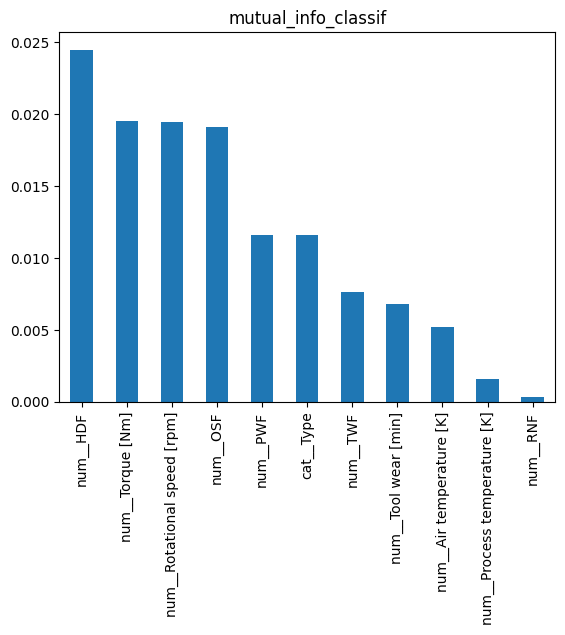

In [21]:
mi.plot(kind='bar',title='mutual_info_classif')

### Create a final pipeline 

In [22]:
from sklearn.preprocessing import OneHotEncoder

## create num pipeline 

num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                             ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                             ('ohe',OneHotEncoder())])

## combine both pipeline

pre2 = ColumnTransformer([('num',num_pipe2,con),
                           ('cat',cat_pipe2,cat)])
pre2


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder())]),
                                 ['Type'])])

In [23]:
X_pre = pre2.fit_transform(X)
X_pre


array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
final_cols =pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [25]:
X_pre = pd.DataFrame(X_pre,columns=final_cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


### Apply train test

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [29]:
xtrain.shape

(109143, 13)

In [30]:
ytrain.shape

(109143, 1)

In [31]:
xtest.shape

(27286, 13)

### Algorithm evaluation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [33]:
## skipped SVM and KNN as they are not suitable for large dataset